In [1]:
import numpy as np  #Modul für wissenschafftliche rechnungen
import matplotlib.pyplot as plt # Visualiesierung der Ergebnisse
from scipy.optimize import curve_fit

In [2]:
data = np.loadtxt("gb1_fN.txt", skiprows= 1) #einlesen der txt Datei

In [3]:
def fit_func(temp_cel, H, T_m, c= 4.3): #definieren Fnúnktion nach welcher gefitet werden soll
    y_N_fit = np.polyfit(data[0:7, 0], data[0:7, 1], 1) #linearer fit um Werte für y_N zu erhalten
    y_U_fit = np.polyfit(data[-3:, 0], data[-3:, 1], 1) #linearer fit um Werte für y_H zu erhalten
    y_N = y_N_fit[0]*temp_cel+ y_N_fit[1]   #berechnen des Wertes für Y_N aus lin. Fit.
    y_U = y_U_fit[0] * temp_cel + y_U_fit[1] #berechnen des Wertes für Y_N aus lin. Fit.
    temp_kel = temp_cel + 273.15    #umrechnen der Temp. in Kelvin
    R = 8.314462 #Gaskonstante
    A_first = (-((H / R) * ((1/temp_kel) - (1/T_m)))) #erster Teil von A
    A_sec = (1 - (T_m/ temp_kel) - np.log(T_m/temp_kel)) #zweiter Teil von A
    A =A_first  - ((c/ R) * A_sec)  # gesamt A
    counter = (y_N + (y_U * np.exp(A))) #Zähler
    denominator = (1+ np.exp(A)) #Nenner
    return counter / denominator

In [4]:
y_N_fit = np.polyfit(data[0:7, 0], data[0:7, 1], 1) #nochmal fit für plot text
y_U_fit = np.polyfit(data[-3:, 0], data[-3:, 1], 1) #nochmal fit für plot text

bounds = ([-np.inf, 300],[np.inf, 400]) #angabe des suchbereiches wenn delta_c 4.3
bounds_2 = ([-np.inf, 300,0],[np.inf, 400,np.inf])  #angabe des suchbereiches wenn delta_c frei
popt, pcov = curve_fit(fit_func, data[:,0],data[:,1], bounds = bounds ) #Fit der Funktion fit_func() wenn delta_c Fest
popt2, pcov2 = curve_fit(fit_func, data[:,0],data[:,1], bounds = bounds_2 ) #Fit der Funktion fit_func() wenn delta_c frei

In [5]:
# Erstellen der Kurven der Fits für den Plot

result = []
result2 = []
for i in range(len(data[:,0])):
    res = fit_func(data[i,0], popt[0],popt[1])
    result.append(res)
    res2= fit_func(data[i,0], popt2[0],popt2[1])
    result2.append(res2)

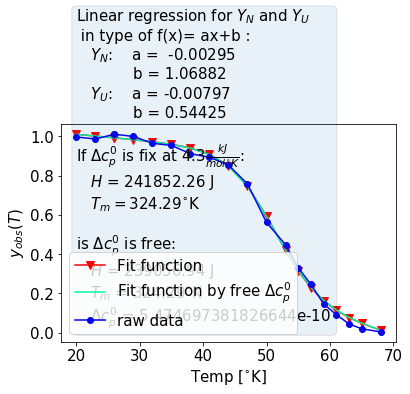

In [6]:
#Ploten der Kurve richtig hüpsch ge? ;)

plt.plot(data[:,0], result, "-v", label= "Fit function ",  markersize= 8, color = "#FF0000") #"#FF0000" "#EE9572"
plt.plot(data[:,0], result2, "-", label= "Fit function by free $\Delta c_p^0$", color = "#00FA9A")   # "#00FA9A" "#1E90FF"
plt.plot(data[:,0], data[:,1], "-o", label=  "raw data", color =  "#0000EE") # Plot von Temperatur zum Meswert "#0000EE" "#2E8B57"

plt.text(20, 0.01, f'Linear regression for $Y_N$ and $Y_U$ \n in type of f(x)= ax+b : \n'
                   f'   $Y_N$:    a =  {round(y_N_fit[0],5)}\n            b = {round(y_N_fit[1],5)} \n'
                   f'   $Y_U$:    a = {round(y_U_fit[0],5)}\n            b = {round(y_U_fit[1],5)} \n\n'
                   r'If $\Delta c_p^0$ is fix at $ 4.3 \frac{kJ}{mol ^{\circ}K}$:'+'\n'
                   f'   $H$ = {round(popt[0],2)} J \n'
                   f'   $T_m = {round(popt[1],2)}$'+'$^{\circ}$K\n\n'
                   r'is $\Delta c_p^0$ is free:' +'\n'
                   f'   $H$ = {round(popt2[0],2)} J \n'
                   f'   $T_m$ = {round(popt2[1],2)}'+'$^{\circ}$K\n'
                   f'   $\Delta c_p^0$ = {popt2[2]} ',
        verticalalignment='bottom', horizontalalignment='left', fontsize=15,  bbox= dict(boxstyle='round', alpha=0.1)) #,facecolor=(1,0.08,0.58)

plt.xticks(fontsize=15)
plt.xlabel("Temp [$^{\circ}$K]",fontsize=15)

plt.yticks(fontsize=15)
plt.ylabel("$y_{obs}(T)$" ,fontsize=15)

plt.legend( fontsize=15)
plt.show()